# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from concurrent.futures import ThreadPoolExecutor, as_completed

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

## Config

In [3]:
# Configuration Details for openweather API.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


def process_data(c,x):
    try:
        cstats = {}
        cstats['searc_city'] = c
        cstats['city'] = x['name']
        cstats['country'] = x['sys']['country']      
        cstats['lat'] = x['coord']['lat']
        cstats['lng'] = x['coord']['lon']
        cstats['temp'] = x['main']['temp']
        cstats['humidity'] = x['main']['humidity']
        cstats['cloudiness'] = x['clouds']['all']
        cstats['windspeed'] = x['wind']['speed']
        return cstats
    except KeyError as e:
        msg = f"Key Error Missing Key - {e}"
        return msg

def getCityStats(qurl, city):
    try:
        response = requests.get(qurl + city).json()
        #print(qurl + city) ## Debug Only!
    except Exception as e:
        return SystemExit(e)
    except requests.exceptions.RequestException as e:
        return SystemExit(e)
    else:
        if response['cod'] == 200:
            cstats = process_data(city, response)
        elif response['cod'] == "404" and response['message'] == "city not found":
            return f"{city}\n City not found. Skipping..."
        else:
            code = response['cod']
            msg = response['message']
            return SystemExit(f"Error {code} - {msg}")
    return cstats        

# This runner will output a list of dictionaries, using the city stat getter
# This runnder uses a configurable worker setting, to allow for better speed.  
# I have tested it with 5 workers, with fast results, However .....
# BE CAREFUL! OpenWeather API limits you. You will get errors if you reach your limit, and will need to wait!
def runner(searchlist):
    threads = []
    cstat_list = []
    nitems = len(searchlist)
    with ThreadPoolExecutor(max_workers=2) as executor:
        counter = 0 
        for city in searchlist:
            threads.append(executor.submit(getCityStats, query_url, city))
            
        for task in as_completed(threads):
            counter = counter+1
            outtext = f"Processing Record {counter} of {nitems} | "
            rs = task.result()
            if type(rs) is dict:
                cstat_list.append(rs)
                print(outtext, rs['city'])
            else:
                print(outtext, task.result())
    print(len(cstat_list), "Successfully Collected")            
    return cstat_list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Test Check to validate connectivity and reponse format
try:
    print(getCityStats(query_url, 'Atlanta'))
except KeyError as k:
    raise SystemExit(k)

{'searc_city': 'Atlanta', 'city': 'Atlanta', 'country': 'US', 'lat': 33.749, 'lng': -84.388, 'temp': 72.43, 'humidity': 37, 'cloudiness': 1, 'windspeed': 8.05}


In [5]:
# Test Check to validate connectivity and reponse format
print(getCityStats(query_url, 'nocity'))

nocity
 City not found. Skipping...


In [6]:
# Make the call and put into datafrom             
citidata = runner(cities)


Processing Record 1 of 606 |  Ushuaia
Processing Record 2 of 606 |  Oytal
Processing Record 3 of 606 |  Bengkulu
Processing Record 4 of 606 |  Muros
Processing Record 5 of 606 |  Rock Sound
Processing Record 6 of 606 |  Khani
Processing Record 7 of 606 |  Nanortalik
Processing Record 8 of 606 |  Dauphin
Processing Record 9 of 606 |  Saint-Philippe
Processing Record 10 of 606 |  mys shmidta
 City not found. Skipping...
Processing Record 11 of 606 |  amderma
 City not found. Skipping...
Processing Record 12 of 606 |  Arrondissement de Dieppe
Processing Record 13 of 606 |  mocambique
 City not found. Skipping...
Processing Record 14 of 606 |  Atuona
Processing Record 15 of 606 |  Najrān
Processing Record 16 of 606 |  New Norfolk
Processing Record 17 of 606 |  Yellowknife
Processing Record 18 of 606 |  Torrington
Processing Record 19 of 606 |  Sitka
Processing Record 20 of 606 |  Cockburn Town
Processing Record 21 of 606 |  Mildura
Processing Record 22 of 606 |  Martapura
Processing Record

Processing Record 190 of 606 |  Sisimiut
Processing Record 191 of 606 |  Kayanga
Processing Record 192 of 606 |  San Luis
Processing Record 193 of 606 |  Urucará
Processing Record 194 of 606 |  Mirşid
Processing Record 195 of 606 |  Ugoofaaru
Processing Record 196 of 606 |  Djibo
Processing Record 197 of 606 |  Terenos
Processing Record 198 of 606 |  Guben
Processing Record 199 of 606 |  Colac
Processing Record 200 of 606 |  Port Blair
Processing Record 201 of 606 |  Novyy Nekouz
Processing Record 202 of 606 |  Ambilobe
Processing Record 203 of 606 |  Porto Belo
Processing Record 204 of 606 |  Maniitsoq
Processing Record 205 of 606 |  Nemuro
Processing Record 206 of 606 |  Batemans Bay
Processing Record 207 of 606 |  Iqaluit
Processing Record 208 of 606 |  Aklavik
Processing Record 209 of 606 |  sentyabrskiy
 City not found. Skipping...
Processing Record 210 of 606 |  Meulaboh
Processing Record 211 of 606 |  Saint-Louis
Processing Record 212 of 606 |  Port Lincoln
Processing Record 213

Processing Record 380 of 606 |  Gizo Government Station
Processing Record 381 of 606 |  Cobija
Processing Record 382 of 606 |  Mehamn
Processing Record 383 of 606 |  Yar-Sale
Processing Record 384 of 606 |  Tegul'det
Processing Record 385 of 606 |  Dāmghān
Processing Record 386 of 606 |  Mizque
Processing Record 387 of 606 |  Corinth
Processing Record 388 of 606 |  Hirara
Processing Record 389 of 606 |  Jojoima
Processing Record 390 of 606 |  Solnechnyy
Processing Record 391 of 606 |  Henties Bay
Processing Record 392 of 606 |  St. George's
Processing Record 393 of 606 |  Bambous Virieux
Processing Record 394 of 606 |  Dunmore Town
Processing Record 395 of 606 |  São José da Coroa Grande
Processing Record 396 of 606 |  vaitupu
 City not found. Skipping...
Processing Record 397 of 606 |  Tuy Hoa
Processing Record 398 of 606 |  Hilton Head
Processing Record 399 of 606 |  Acton
Processing Record 400 of 606 |  Dehlorān
Processing Record 401 of 606 |  College
Processing Record 402 of 606 | 

Processing Record 570 of 606 |  Balakovo
Processing Record 571 of 606 |  Manakara
Processing Record 572 of 606 |  old road
 City not found. Skipping...
Processing Record 573 of 606 |  Pedasí
Processing Record 574 of 606 |  Båtsfjord
Processing Record 575 of 606 |  Val-David
Processing Record 576 of 606 |  Kisiwani
Processing Record 577 of 606 |  Port Macquarie
Processing Record 578 of 606 |  Zlobin
Processing Record 579 of 606 |  Opuwo
Processing Record 580 of 606 |  Gamba
Processing Record 581 of 606 |  Samarai
Processing Record 582 of 606 |  paiho
 City not found. Skipping...
Processing Record 583 of 606 |  paradwip
 City not found. Skipping...
Processing Record 584 of 606 |  Grants Pass
Processing Record 585 of 606 |  Motema
Processing Record 586 of 606 |  Cascais
Processing Record 587 of 606 |  Linhares
Processing Record 588 of 606 |  Trzebiatów
Processing Record 589 of 606 |  Emba
Processing Record 590 of 606 |  Nyurba
Processing Record 591 of 606 |  Kloulklubed
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
citydatadf = pd.DataFrame(citidata)
citydatadf.to_csv('citydata.csv', index=False)
citydatadf.head(10)

,searc_city,city,country,lat,lng,temp,humidity,cloudiness,windspeed
0,ushuaia,Ushuaia,AR,-54.8000,-68.3000,50.00,53,40,20.71
1,oytal,Oytal,KZ,42.9057,73.2697,55.27,56,33,7.20
2,bengkulu,Bengkulu,ID,-3.8004,102.2655,77.02,91,99,3.87
3,muros,Muros,ES,42.7762,-9.0603,62.02,94,100,3.00
4,rock sound,Rock Sound,BS,24.9000,-76.2000,77.90,73,70,12.35
5,khani,Khani,GE,41.9563,42.9566,69.80,52,0,5.75
6,nanortalik,Nanortalik,GL,60.1432,-45.2371,38.43,75,36,7.11
7,dauphin,Dauphin,CA,51.1494,-100.0502,53.60,76,1,3.44
8,saint-philippe,Saint-Philippe,RE,-21.3585,55.7679,74.61,73,34,18.41
9,dieppe,Arrondissement de Dieppe,FR,49.7500,1.1667,60.35,57,39,1.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
citydatadf.describe()
## Use MAX to see if there are any over 100.

,lat,lng,temp,humidity,cloudiness,windspeed
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,19.360607,18.222480,66.278686,65.241563,52.307282,8.116465
std,33.220443,90.501402,18.639514,23.436260,37.614874,5.315311
min,-54.800000,-179.166700,9.230000,4.000000,0.000000,0.160000
25%,-8.055950,-64.329300,53.890000,50.500000,18.000000,4.440000
50%,22.276900,23.133300,69.800000,70.000000,59.000000,6.910000
75%,46.999950,95.725350,79.285000,84.000000,90.000000,10.370000
max,78.218600,179.316700,110.140000,100.000000,100.000000,28.770000


In [9]:
# Another way, Return rows with humidity greater than 100.
hundredpluscitiesdf = citydatadf[citydatadf['humidity'] <= 100]

In [10]:
#  Get the indices of cities that have humidity over 100%.
citydatadf.index[citydatadf['humidity'] > 100].tolist()

[]

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = citydatadf[citydatadf['humidity'] <= 100]
clean_city_data.head()

,searc_city,city,country,lat,lng,temp,humidity,cloudiness,windspeed
0,ushuaia,Ushuaia,AR,-54.8000,-68.3000,50.00,53,40,20.71
1,oytal,Oytal,KZ,42.9057,73.2697,55.27,56,33,7.20
2,bengkulu,Bengkulu,ID,-3.8004,102.2655,77.02,91,99,3.87
3,muros,Muros,ES,42.7762,-9.0603,62.02,94,100,3.00
4,rock sound,Rock Sound,BS,24.9000,-76.2000,77.90,73,70,12.35


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

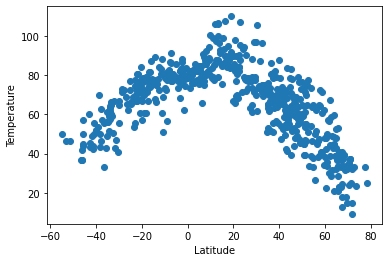

In [12]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

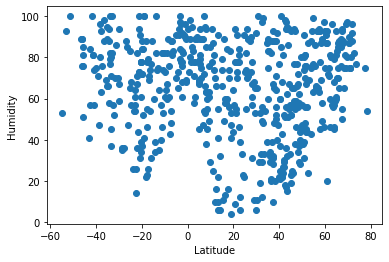

In [13]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

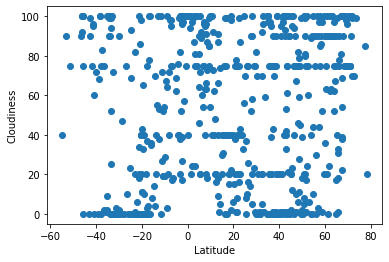

In [14]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

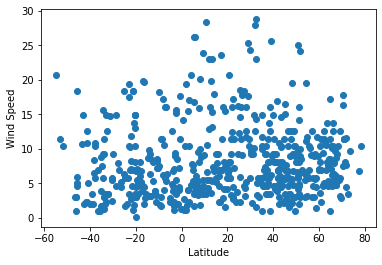

In [15]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['windspeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [16]:
x_values = clean_city_data['lat']
y_values = clean_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      81.696754
1      61.383636
2      71.093884
3      61.410559
4      65.127040
         ...    
558    70.948727
559    67.475969
560    62.540876
561    66.883804
562    77.601103
Name: lat, Length: 563, dtype: float64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
northhem_city_data = clean_city_data[clean_city_data['lat'] > 0]

y = -0.84x +97.33
The r-value is: 0.6922212123435428


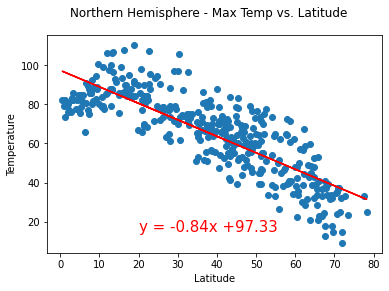

In [18]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Max Temp vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-temp-vs-lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.79x +85.31
The r-value is: 0.6443247417588024


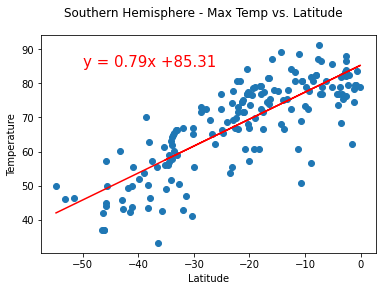

In [19]:
southern_hem_city_data = clean_city_data[clean_city_data['lat'] < 0]
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Max Temp vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-temp-vs-lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.16x +57.04
The r-value is: 0.016793398673600607


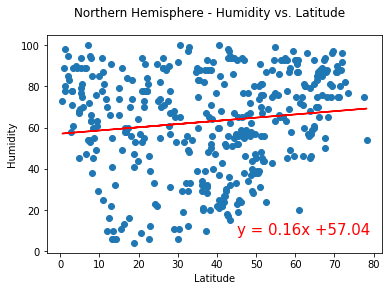

In [20]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Humidity vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-humidity-vs-lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.01x +70.16
The r-value is: 2.164483744429927e-05


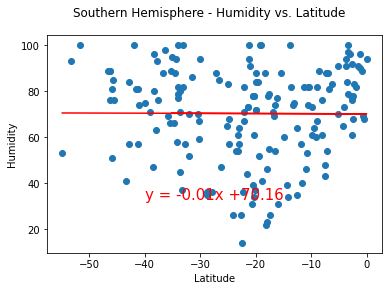

In [21]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Humidity vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-40,33),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-humidity-vs-lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.09x +50.91
The r-value is: 0.0024210949076566273


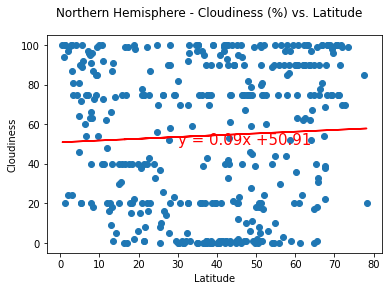

In [22]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(30,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-cloudiness-vs-lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.07x +46.37
The r-value is: 0.0005909191309773564


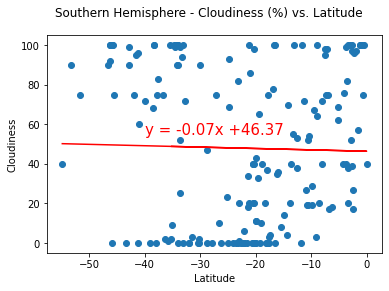

In [23]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-cloudiness-vs-lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.16x +57.04
The r-value is: 0.016793398673600607


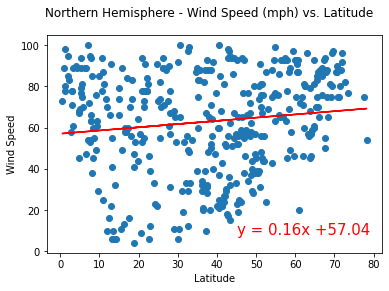

In [24]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(45,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-windspeed-vs-lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.0x +7.19
The r-value is: 1.832207479705482e-05


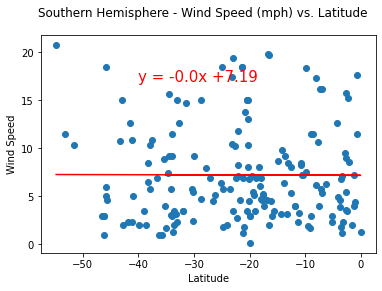

In [25]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-40,17),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-windspeed-vs-lat.png")
plt.show()